In [4]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [15.42, 15.23, 15.30, 15.82, 15.77, 15.98, 15.72, 16.18, 16.27, 16.24, 16.07, 16.28]

# Calculate the total number of IDs generated in a year
total_ids_in_year = sum(original_num_ids_list)

# Desired total count of data
desired_total_count = 34730

# Calculate the scaling factor
scaling_factor = desired_total_count / total_ids_in_year

print(f"Scaling factor to achieve {desired_total_count} data points: {scaling_factor}")

#scaling_factor = 182.52 #desired_total_count / total_ids_in_year

print(scaling_factor)

# Calculate the scaled number of IDs for each month
num_ids_list = [int(np.ceil(original_num_ids * scaling_factor)) for original_num_ids in original_num_ids_list]

num_ids_list

Scaling factor to achieve 34730 data points: 182.5204961109943
182.5204961109943


NameError: name 'np' is not defined

In [31]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define the mode_of_arrival options
mode_of_arrival_options = ['Ambulance', 'Own Vehicle', 'Walk In', 'Other']

# Define the disposition options
disposition_options = ['HOME', 'ADMITTED', 'ELOPED', 'LEFT WITHOUT BEING SEEN', 'OTHER', 'LEFT AGAINST MEDICAL ADVICE', 'EXPIRED']

# Define the gender options
gender_options = ['M', 'F']

# Set a seed for reproducibility (optional)
random.seed(2020)

desired_total_count = 34730

# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [15.42, 15.23, 15.30, 15.82, 15.77, 15.98, 15.72, 16.18, 16.27, 16.24, 16.07, 16.28]

# Calculate the total number of IDs generated in a year
total_ids_in_year = sum(original_num_ids_list)

# Define the scaling factor
scaling_factor = desired_total_count / total_ids_in_year

print(scaling_factor)

# Calculate the scaled number of IDs for each month
num_ids_list = [int(original_num_ids * scaling_factor) for original_num_ids in original_num_ids_list]

# Define the start and end years, including a leap year
start_year = 2015
end_year = 2020

# Create an empty list to store data
data = []

# Initialize a linear trend factor
linear_trend_factor = 1

# Loop through each year
for year in range(start_year, end_year + 1):
    # Introduce a random percentage increase between 20% and 50%
    percentage_increase = random.uniform(0.30, 0.50)
    num_ids_list_with_increase = [int(num_ids * (1 + percentage_increase)) for num_ids in num_ids_list]

    # Apply the linear trend factor
    num_ids_list_with_trend = [int(num_ids * linear_trend_factor) for num_ids in num_ids_list_with_increase]

    # Adjust the linear trend factor for the next year (you can customize this)
    linear_trend_factor += 0.05  # Adjust the trend factor as needed

    # Determine if the current year is a leap year
    is_leap_year = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

    # Calculate the number of patients with 'Transfer_date' for the current year
    total_patients = sum(num_ids_list_with_trend)
    num_transfer_patients = int(total_patients * 0.035)

    # Loop through each month
    for month, num_ids in enumerate(num_ids_list_with_trend, start=1):
        # Introduce seasonality by varying the number of IDs based on the month
        seasonality_factor = 1 + np.sin(2 * np.pi * (month - 1) / 12)  # Adjust the seasonality factor as needed
        num_ids = int(num_ids * seasonality_factor)

        # Determine the number of days in the current month
        if month == 2 and is_leap_year:
            last_day = 29  # February in a leap year
        else:
            last_day = 28  # Initialize with a safe value
            try:
                last_day = (datetime(year, month + 1, 1) - timedelta(days=1)).day
            except ValueError:
                pass

        # Generate random IDs, start dates, end dates, mode_of_arrival, and disposition for the current month
        for _ in range(num_ids):
            day = random.randint(1, last_day)  # Generate a random day within the month
            start_date = datetime(year, month, day)
            end_date = start_date + timedelta(days=random.randint(1, 30))  # Generate a random end date within 30 days
            id_value = random.randint(1000000, 99999999)  # Generate 8 digits Patient IDs
            arrival_mode = random.choice(mode_of_arrival_options)
            gender = random.choice(gender_options)

            # Determine if this patient should have a 'Transfer_date'
            if num_transfer_patients > 0:
                transfer_date = random.choice([start_date, end_date])
                num_transfer_patients -= 1
                disposition = 'TRANSFER'
            else:
                transfer_date = None
                disposition = random.choice(disposition_options)

            if transfer_date == start_date:
                transfer_type = 'Transfer Admissions/Incoming Transfers'
            elif transfer_date == end_date:
                transfer_type = 'Discharge for Transfer/Outgoing Transfers'
            else:
                transfer_type = ''

            data.append([start_date, end_date, transfer_date, id_value, arrival_mode, disposition, transfer_type, gender])

# Create a Pandas DataFrame from the data
master_data = pd.DataFrame(data, columns=["Admission Date", "Discharge Date", "Transfer Date", "Patient ID", "Mode of Arrival", "Disposition", "Transfer Type", "Gender"])

# Assuming 'master_data' is your DataFrame
# Convert the 'Admission Date' column to datetime if it's not already
master_data['Admission Date'] = pd.to_datetime(master_data['Admission Date'])

# Extract the year from the 'Admission Date' column
master_data['Year'] = master_data['Admission Date'].dt.year

# Group by year and count admissions
yearly_admissions = master_data.groupby('Year')['Patient ID'].count()

yearly_admissions_percentage_increase = yearly_admissions.pct_change() * 100

# Print the results
print(yearly_admissions_percentage_increase)

182.5204961109943
Year
2015          NaN
2016    -3.834036
2017    19.291975
2018    -8.426666
2019     7.589538
2020    15.759177
Name: Patient ID, dtype: float64


ValueError: x and y must have same first dimension, but have shapes (6,) and (72,)

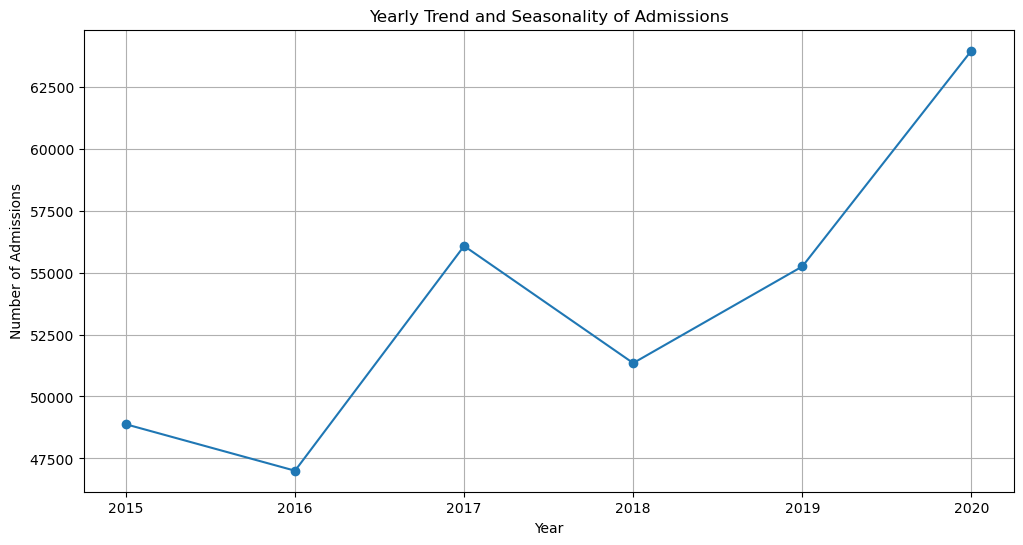

In [22]:
import matplotlib.pyplot as plt

# Assuming 'yearly_admissions' is your DataFrame
# Extract the 'Year' and 'Patient ID' columns
yearly_admissions = yearly_admissions.reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the trend
plt.plot(yearly_admissions['Year'], yearly_admissions['Patient ID'], marker='o', label='Admissions')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.title('Yearly Trend and Seasonality of Admissions')
plt.grid(True)

# Generate seasonality data for each year
seasonality = [10 * np.sin(2 * np.pi * (month - 1) / 12) for year in range(start_year, end_year + 1) for month in range(1, 13)]

# Plot the seasonality
plt.plot(range(start_year, end_year + 1), seasonality, linestyle='--', label='Seasonality', color='red')

plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (6,) and (72,)

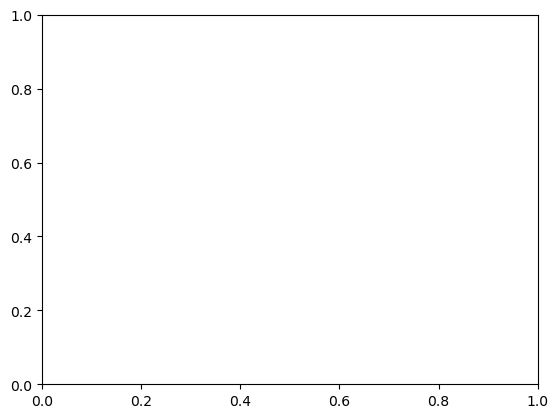

In [15]:
# Generate seasonality data for each year
seasonality = [10 * np.sin(2 * np.pi * (month - 1) / 12) for year in range(start_year, end_year + 1) for month in range(1, 13)]

# Plot the seasonality
plt.plot(range(start_year, end_year + 1), seasonality, linestyle='--', label='Seasonality', color='red')

plt.legend()
plt.show()


In [ ]:
num_ids_list

In [29]:
import pandas as pd

# Assuming 'master_data' is your DataFrame
# Convert the 'Admission Date' column to datetime if it's not already
master_data['Admission Date'] = pd.to_datetime(master_data['Admission Date'])

# Extract the year from the 'Admission Date' column
master_data['Year'] = master_data['Admission Date'].dt.year

# Group by year and count admissions
yearly_admissions = master_data.groupby('Year')['Patient ID'].count()


yearly_admissions

Year
2015    49181
2016    53155
2017    52735
2018    56239
2019    55165
2020    60486
Name: Patient ID, dtype: int64

In [25]:
yearly_admissions_percentage_increase = yearly_admissions.pct_change() * 100

# Print the results
print(yearly_admissions_percentage_increase)

Year
2015          NaN
2016    -3.834036
2017    19.291975
2018    -8.426666
2019     7.589538
2020    15.759177
Name: Patient ID, dtype: float64


In [26]:
master_data.groupby('Admission Date')['Patient ID'].count()

Admission Date
2015-01-01    117
2015-01-02    131
2015-01-03    130
2015-01-04    140
2015-01-05    130
             ... 
2020-12-24     95
2020-12-25     94
2020-12-26     88
2020-12-27    114
2020-12-28    102
Name: Patient ID, Length: 1988, dtype: int64

ADF Statistic: -4.231574609938204
p-value: 0.0005823391734510882
Critical Values:
   1%: -3.4333656834518345
   5%: -2.86287222420477
   10%: -2.567479209522704


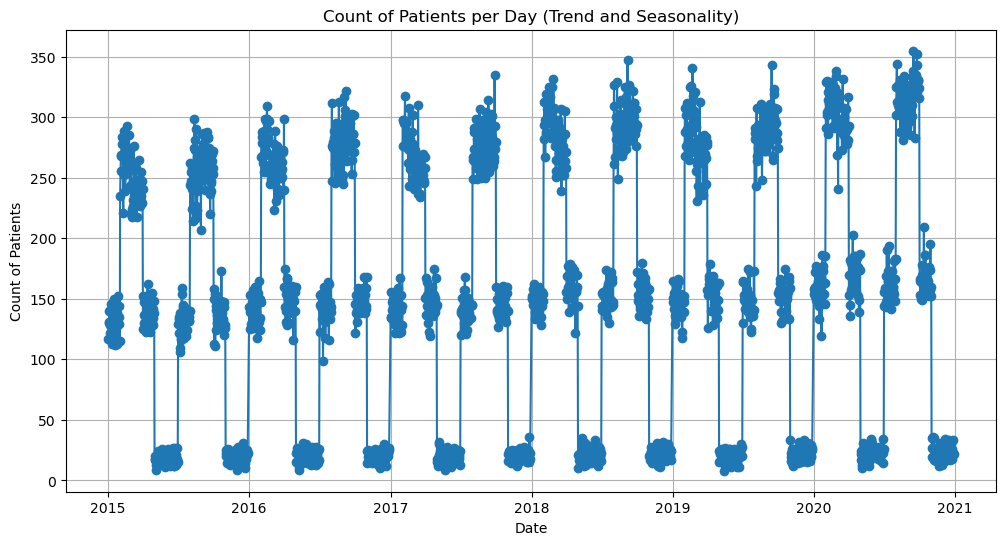

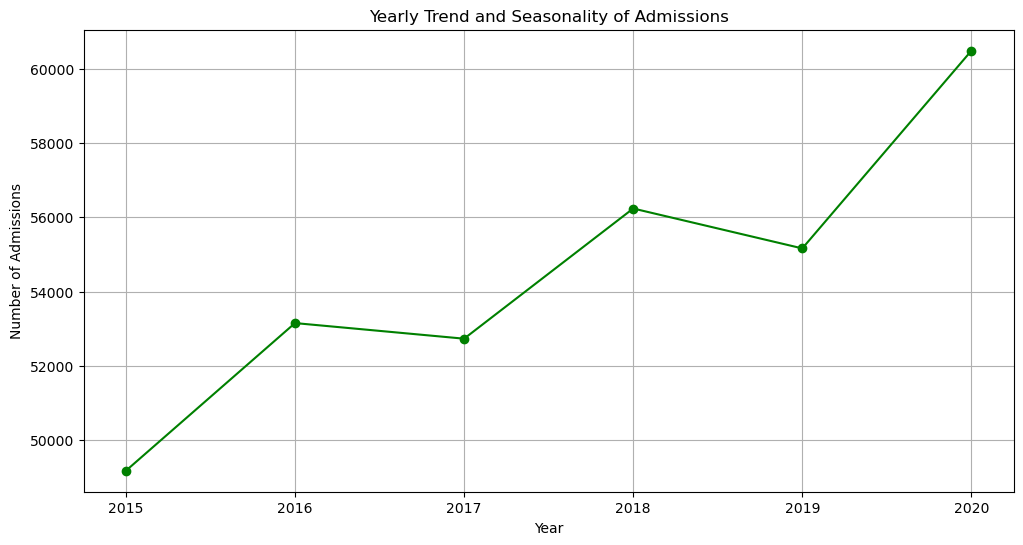

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Group the data by "Admission Date" and get the count of patients for each day
daily_counts = master_data.groupby(master_data['Admission Date'].dt.date)['Patient ID'].count()

# Perform the ADF test
result = adfuller(daily_counts)

# Extract and print the ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Create a line graph to visualize the trend and seasonality
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Count of Patients")
plt.title("Count of Patients per Day (Trend and Seasonality)")
plt.grid(True)

# Show the plot
plt.show()


yearly_admissions = yearly_admissions.reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the trend
plt.plot(yearly_admissions['Year'], yearly_admissions['Patient ID'], marker='o', label='Admissions', color = 'green')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.title('Yearly Trend and Seasonality of Admissions')
plt.grid(True)

# OLD

In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define the mode_of_arrival options
mode_of_arrival_options = ['Ambulance', 'Own Vehicle', 'Walk In', 'Other']

# Define the disposition options
disposition_options = ['HOME', 'ADMITTED', 'ELOPED', 'LEFT WITHOUT BEING SEEN', 'OTHER', 'LEFT AGAINST MEDICAL ADVICE', 'EXPIRED']

#Define the gender options
gender_options = ['M','F']

# Set a seed for reproducibility (optional)
random.seed(2020)

desired_total_count = 34730


# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [15.42, 15.23, 15.30, 15.82, 15.77, 15.98, 15.72, 16.18, 16.27, 16.24, 16.07, 16.28]
##[ 10, 10, 10, 10 ,10 ,10 ,10 ,11 ,10 ,11 ,10 ,10 ]

# Calculate the total number of IDs generated in a year
total_ids_in_year = sum(original_num_ids_list)

# Define the scaling factor
# scaling_factor = 20

scaling_factor = desired_total_count / total_ids_in_year

print(scaling_factor)

# Calculate the scaled number of IDs for each month
num_ids_list = [int(original_num_ids * scaling_factor) for original_num_ids in original_num_ids_list]

# Define the start and end years, including a leap year
start_year = 2015
end_year = 2020

# Create an empty list to store data
data = []

# Loop through each year
for year in range(start_year, end_year + 1):
    # Introduce a linear trend for the number of IDs
    trend_factor = (year - start_year + 1) * 2  # Adjust the trend factor as needed
    num_ids_list_with_trend = [int(num_ids * trend_factor) for num_ids in num_ids_list]

    # Determine if the current year is a leap year
    is_leap_year = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

    # Calculate the number of patients with 'Transfer_date' for the current year
    total_patients = sum(num_ids_list_with_trend)
    num_transfer_patients = int(total_patients * 0.035)

    # Loop through each month
    for month, num_ids in enumerate(num_ids_list_with_trend, start=1):
        # Introduce seasonality by varying the number of IDs based on the month
        seasonality_factor = 1 + np.sin(2 * np.pi * (month - 1) / 6)  # Adjust the seasonality factor as needed
        num_ids = int(num_ids * seasonality_factor)

        # Determine the number of days in the current month
        if month == 2 and is_leap_year:
            last_day = 29  # February in a leap year
        else:
            last_day = 28  # Initialize with a safe value
            try:
                last_day = (datetime(year, month + 1, 1) - timedelta(days=1)).day
            except ValueError:
                pass

        # Generate random IDs, start dates, end dates, mode_of_arrival, and disposition for the current month
        for _ in range(num_ids):
            day = random.randint(1, last_day)  # Generate a random day within the month
            start_date = datetime(year, month, day)
            end_date = start_date + timedelta(days=random.randint(1, 30))  # Generate a random end date within 30 days
            id_value = random.randint(1000000, 99999999)  # Generate 8 digits Patient IDs
            arrival_mode = random.choice(mode_of_arrival_options)
            gender = random.choice(gender_options)

            # Determine if this patient should have a 'Transfer_date'
            if num_transfer_patients > 0:
                transfer_date = random.choice([start_date, end_date])
                num_transfer_patients -= 1
                disposition = 'TRANSFER'
            else:
                transfer_date = None
                disposition = random.choice(disposition_options)
            
            if transfer_date == start_date:
                transfer_type = 'Transfer Admissions/Incoming Transfers'
            elif transfer_date == end_date:
                transfer_type = 'Discharge for Transfer/Outgoing Transfers'
            else:
                transfer_type = ''

            data.append([start_date, end_date, transfer_date, id_value, arrival_mode, disposition, transfer_type, gender])

# Create a Pandas DataFrame from the data
master_data = pd.DataFrame(data, columns=["Admission Date", "Discharge Date", "Transfer Date", "Patient ID", "Mode of Arrival", "Disposition", "Transfer Type", "Gender"])

# Assuming 'master_data' is your DataFrame
# Convert the 'Admission Date' column to datetime if it's not already
master_data['Admission Date'] = pd.to_datetime(master_data['Admission Date'])

# Extract the year from the 'Admission Date' column
master_data['Year'] = master_data['Admission Date'].dt.year

# Group by year and count admissions
yearly_admissions = master_data.groupby('Year')['Patient ID'].count()


yearly_admissions_percentage_increase = yearly_admissions.pct_change() * 100

# Print the results
print(yearly_admissions_percentage_increase)

182.5204961109943
Year
2015           NaN
2016    100.005790
2017     50.003618
2018     33.333012
2019     25.000543
2020     20.000637
Name: Patient ID, dtype: float64


In [5]:
# Define the mode_of_arrival options
mode_of_arrival_options = ['Ambulance', 'Own Vehicle', 'Walk In', 'Other']

# Define the disposition options
disposition_options = ['HOME', 'ADMITTED', 'ELOPED', 'LEFT WITHOUT BEING SEEN', 'OTHER', 'LEFT AGAINST MEDICAL ADVICE', 'EXPIRED']

# Define the gender options
gender_options = ['M', 'F']

# Set a seed for reproducibility (optional)
random.seed(2020)

desired_total_count = 34730

# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [15.42, 15.23, 15.30, 15.82, 15.77, 15.98, 15.72, 16.18, 16.27, 16.24, 16.07, 16.28]

# Calculate the total number of IDs generated in a year
total_ids_in_year = sum(original_num_ids_list)

# Define the scaling factor
scaling_factor = desired_total_count / total_ids_in_year

print('Scaling Factor:',scaling_factor)

# Calculate the scaled number of IDs for each month
num_ids_list = [int(original_num_ids * scaling_factor) for original_num_ids in original_num_ids_list]

# Define the start and end years, including a leap year
start_year = 2015
end_year = 2020

# Create an empty list to store data
data = []

# Initialize a linear trend factor
linear_trend_factor = 1

# Loop through each year
for year in range(start_year, end_year + 1):
    # Introduce a random percentage increase between 20% and 50%
    percentage_increase = random.uniform(0.30, 0.50)
    print('% increase:', percentage_increase)
    num_ids_list_with_increase = [int(num_ids * (1 + percentage_increase)) for num_ids in num_ids_list]

    # Apply the linear trend factor
    num_ids_list_with_trend = [int(num_ids * linear_trend_factor) for num_ids in num_ids_list_with_increase]

    # Adjust the linear trend factor for the next year (you can customize this)
    linear_trend_factor += 0.05  # Adjust the trend factor as needed

    # Determine if the current year is a leap year
    is_leap_year = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

    # Calculate the number of patients with 'Transfer_date' for the current year
    total_patients = sum(num_ids_list_with_trend)
    num_transfer_patients = int(total_patients * 0.035)

    # Loop through each month
    for month, num_ids in enumerate(num_ids_list_with_trend, start=1):
        # Introduce seasonality by varying the number of IDs based on the month
        seasonality_factor = 1 + np.sin(2 * np.pi * (month - 1) / 12)  # Adjust the seasonality factor as needed
        num_ids = int(num_ids * seasonality_factor)

        # Determine the number of days in the current month
        if month == 2 and is_leap_year:
            last_day = 29  # February in a leap year
        else:
            last_day = 28  # Initialize with a safe value
            try:
                last_day = (datetime(year, month + 1, 1) - timedelta(days=1)).day
            except ValueError:
                pass

        # Generate random IDs, start dates, end dates, mode_of_arrival, and disposition for the current month
        for _ in range(num_ids):
            day = random.randint(1, last_day)  # Generate a random day within the month
            start_date = datetime(year, month, day)
            end_date = start_date + timedelta(days=random.randint(1, 30))  # Generate a random end date within 30 days
            id_value = random.randint(1000000, 99999999)  # Generate 8 digits Patient IDs
            arrival_mode = random.choice(mode_of_arrival_options)
            gender = random.choice(gender_options)

            # Determine if this patient should have a 'Transfer_date'
            if num_transfer_patients > 0:
                transfer_date = random.choice([start_date, end_date])
                num_transfer_patients -= 1
                disposition = 'TRANSFER'
            else:
                transfer_date = None
                disposition = random.choice(disposition_options)

            if transfer_date == start_date:
                transfer_type = 'Transfer Admissions/Incoming Transfers'
            elif transfer_date == end_date:
                transfer_type = 'Discharge for Transfer/Outgoing Transfers'
            else:
                transfer_type = ''

            data.append([start_date, end_date, transfer_date, id_value, arrival_mode, disposition, transfer_type, gender])

# Create a Pandas DataFrame from the data
master_data = pd.DataFrame(data, columns=["Admission Date", "Discharge Date", "Transfer Date", "Patient ID", "Mode of Arrival", "Disposition", "Transfer Type", "Gender"])


master_data.to_csv('ADT dataset V1.csv')

# Assuming 'master_data' is your DataFrame
# Convert the 'Admission Date' column to datetime if it's not already
master_data['Admission Date'] = pd.to_datetime(master_data['Admission Date'])

# Extract the year from the 'Admission Date' column
master_data['Year'] = master_data['Admission Date'].dt.year

# Group by year and count admissions
yearly_admissions = master_data.groupby('Year')['Patient ID'].count()

yearly_admissions_percentage_increase = yearly_admissions.pct_change() * 100

print(yearly_admissions)
# Print the results
print(yearly_admissions_percentage_increase)

Scaling Factor: 182.5204961109943
% increase: 0.4239338541321323
% increase: 0.30421271344550327
% increase: 0.48515141065177525
% increase: 0.3009905055772699
% increase: 0.3412149102243409
% increase: 0.4904269834207419
Year
2015    48878
2016    47004
2017    56072
2018    51347
2019    55244
2020    63950
Name: Patient ID, dtype: int64
Year
2015          NaN
2016    -3.834036
2017    19.291975
2018    -8.426666
2019     7.589538
2020    15.759177
Name: Patient ID, dtype: float64


In [8]:
import random
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Define the mode_of_arrival options
mode_of_arrival_options = ['Ambulance', 'Own Vehicle', 'Walk In', 'Other']

# Define the disposition options
disposition_options = ['HOME', 'ADMITTED', 'ELOPED', 'LEFT WITHOUT BEING SEEN', 'OTHER', 'LEFT AGAINST MEDICAL ADVICE', 'EXPIRED']

# Define the gender options
gender_options = ['M', 'F']

# Set a seed for reproducibility (optional)
random.seed(2020)

desired_total_count = 34730

# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [15.42, 15.23, 15.30, 15.82, 15.77, 15.98, 15.72, 16.18, 16.27, 16.24, 16.07, 16.28]

# Calculate the total number of IDs generated in a year
total_ids_in_year = sum(original_num_ids_list)

# Define the scaling factor
scaling_factor = desired_total_count / total_ids_in_year

print('Scaling Factor:', scaling_factor)

# Calculate the scaled number of IDs for each month
num_ids_list = [int(original_num_ids * scaling_factor) for original_num_ids in original_num_ids_list]

# Define the start and end years, including a leap year
start_year = 2015
end_year = 2020

# Create an empty list to store data
data = []

# Initialize a linear trend factor
linear_trend_factor = 1

# Loop through each year
for year in range(start_year, end_year + 1):
    # Introduce a random percentage increase between 20% and 50%
    percentage_increase = random.uniform(0.30, 0.50)
    print('% increase:', percentage_increase)
    num_ids_list_with_increase = [int(num_ids * (1 + percentage_increase)) for num_ids in num_ids_list]

    # Apply the linear trend factor
    num_ids_list_with_trend = [int(num_ids * linear_trend_factor) for num_ids in num_ids_list_with_increase]

    # Adjust the linear trend factor for the next year (you can customize this)
    linear_trend_factor += 0.05  # Adjust the trend factor as needed

    # Determine if the current year is a leap year
    is_leap_year = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

    # Calculate the number of patients with 'Transfer_date' for the current year
    total_admissions = sum(num_ids_list_with_trend)
    num_transfer_patients = int(total_admissions * 0.035)

    # Calculate the number of transfer patients for the current year
    num_transfer_patients_yearly = int(total_admissions * 0.035)

    # Spread out transfer patients throughout the year
    transfer_month_distribution = [int(num_transfer_patients_yearly / 12)] * 12
    remaining_transfers = num_transfer_patients_yearly % 12

    # Distribute the remaining transfer patients randomly across the months
    for _ in range(remaining_transfers):
        random_month = random.randint(0, 11)
        transfer_month_distribution[random_month] += 1

    # Loop through each month
    for month, num_ids in enumerate(num_ids_list_with_trend, start=1):
        # Introduce seasonality by varying the number of IDs based on the month
        seasonality_factor = 1 + np.sin(2 * np.pi * (month - 1) / 12)  # Adjust the seasonality factor as needed
        num_ids = int(num_ids * seasonality_factor)

        # Generate random IDs, start dates, end dates, mode_of_arrival, and disposition for the current month
        for _ in range(num_ids):
            day = random.randint(1, 28)  # Generate a random day within the month
            start_date = datetime(year, month, day)
            end_date = start_date + timedelta(days=random.randint(1, 30))  # Generate a random end date within 30 days
            id_value = random.randint(1000000, 99999999)  # Generate 8 digits Patient IDs
            arrival_mode = random.choice(mode_of_arrival_options)
            gender = random.choice(gender_options)

            # Determine if this patient should have a 'Transfer_date'
            if transfer_month_distribution[month - 1] > 0:
                transfer_date = start_date
                transfer_month_distribution[month - 1] -= 1
                disposition = 'TRANSFER'
            else:
                transfer_date = None
                disposition = random.choice(disposition_options)

            if transfer_date == start_date:
                transfer_type = 'Transfer Admissions/Incoming Transfers'
            else:
                transfer_type = ''

            data.append([start_date, end_date, transfer_date, id_value, arrival_mode, disposition, transfer_type, gender])

# Create a Pandas DataFrame from the data
master_data = pd.DataFrame(data, columns=["Admission Date", "Discharge Date", "Transfer Date", "Patient ID", "Mode of Arrival", "Disposition", "Transfer Type", "Gender"])

master_data.to_csv('ADT dataset V3.csv')

# Assuming 'master_data' is your DataFrame
# Convert the 'Admission Date' column to datetime if it's not already
master_data['Admission Date'] = pd.to_datetime(master_data['Admission Date'])

# Extract the year from the 'Admission Date' column
master_data['Year'] = master_data['Admission Date'].dt.year

# Group by year and count admissions
yearly_admissions = master_data.groupby('Year')['Patient ID'].count()

yearly_admissions_percentage_increase = yearly_admissions.pct_change() * 100

print(yearly_admissions)
# Print the results
print(yearly_admissions_percentage_increase)


Scaling Factor: 182.5204961109943
% increase: 0.4239338541321323
% increase: 0.3074988430156789
% increase: 0.3708261589685712
% increase: 0.4976813389239167
% increase: 0.3975210925249858
% increase: 0.4219594918201598
Year
2015    48878
2016    47117
2017    51754
2018    59118
2019    57559
2020    61011
Name: Patient ID, dtype: int64
Year
2015          NaN
2016    -3.602848
2017     9.841458
2018    14.228852
2019    -2.637099
2020     5.997324
Name: Patient ID, dtype: float64


In [9]:
master_data.to_csv('testing1.csv')